In [187]:
import numpy as np
import matplotlib.pyplot as plt

from numpy.linalg import inv

$$
    t\sim N(w^Tx, \eps)
$$

$$
    w^* = (XX^T)^{-1} Xy
$$

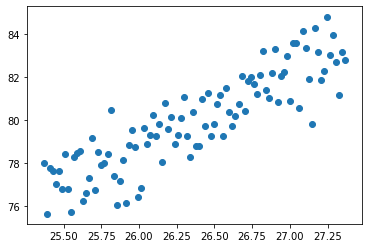

In [188]:
X = np.linspace(-1, 1, 100) + np.random.uniform(100) * 0.6
y = 3 * X + 1 + np.random.randn(100)
plt.scatter(X, y)

In [189]:
from sklearn.linear_model import LinearRegression

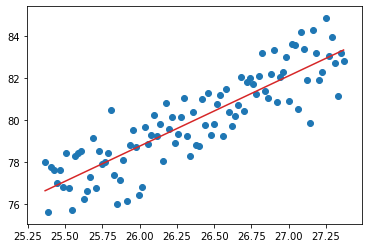

In [190]:
X = X[:, np.newaxis]

lr = LinearRegression()
lr.fit(X, y)

xrange = np.linspace(X.min(), X.max(), 100)[:, np.newaxis]
yhat = lr.predict(xrange)
plt.plot(xrange, yhat, c="tab:red")
plt.scatter(X.ravel(), y)

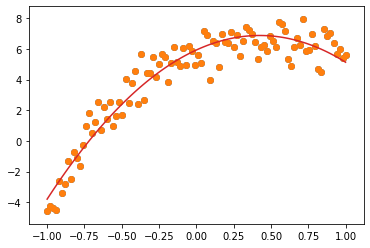

In [191]:
X = np.linspace(-1, 1, 100)
y = 6 + 3 * X - 5 * X ** 2 + 2.4 * X ** 3 + np.random.randn(100) * 0.8
plt.scatter(X, y)

X = X[:, np.newaxis]
X = np.c_[X, X**2]

lr = LinearRegression()
lr.fit(X, y)

xrange = np.linspace(X.min(), X.max(), 100)[:, np.newaxis]
xr = np.c_[xrange, xrange**2]
yhat = lr.predict(xr)
plt.plot(xrange, yhat, c="tab:red")
plt.scatter(X[:, 0], y)

In [192]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

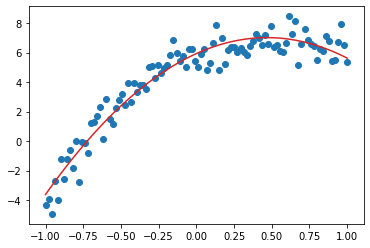

In [193]:
X = np.linspace(-1, 1, 100)
y = 6 + 3 * X - 5 * X ** 2 + 2.4 * X ** 3 + np.random.randn(100) * 0.8

poly = PolynomialFeatures(degree=2, include_bias=False)
Xt = poly.fit_transform(X[:, np.newaxis])

lr = LinearRegression()
lr.fit(Xt, y)

xrange = np.linspace(X.min(), X.max(), 100)[:, np.newaxis]
xrange = poly.transform(xrange)
yhat = lr.predict(xrange)
plt.scatter(X, y)
plt.plot(Xt[:,0], yhat, c="tab:red")

In [194]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [195]:
X_train = np.linspace(-1, 1, 100) + np.random.uniform(size=100)
X_test = np.linspace(-1, 1, 20)

def y_make(X):
    n_inputs = len(X)
    y = 6 + 3 * X - 5 * X ** 2 + 2.4 * X ** 3 + np.random.randn(n_inputs) * 0.8
    return y

y_train = y_make(X_train)
y_test = y_make(X_test)

print(X_train.shape)
print(y_train.shape)

(100,)
(100,)


In [196]:
def make_pipe(deg, X, y):
    pipe = Pipeline([
        ("poly_transform", PolynomialFeatures(degree=deg, 
                                              include_bias=False)),
        ("linear_model", LinearRegression())
    ])
    pipe.fit(x[: np.newaxis], y)
    return pipe

In [197]:
pipe = make_pipe(20, X_train, y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[40.67563286 40.69583488 40.7160369  40.73623892 40.75644094 40.77664296
 40.79684499 40.81704701 40.83724903 40.85745105 40.87765307 40.89785509
 40.91805711 40.93825913 40.95846115 40.97866317 40.99886519 41.01906721
 41.03926923 41.05947125 41.07967327 41.09987529 41.12007731 41.14027933
 41.16048135 41.18068337 41.20088539 41.22108741 41.24128943 41.26149145
 41.28169347 41.30189549 41.32209751 41.34229953 41.36250155 41.38270357
 41.40290559 41.42310761 41.44330963 41.46351165 41.48371367 41.50391569
 41.52411771 41.54431973 41.56452175 41.58472377 41.60492579 41.62512781
 41.64532983 41.66553185 41.68573387 41.70593589 41.72613791 41.74633993
 41.76654195 41.78674398 41.806946   41.82714802 41.84735004 41.86755206
 41.88775408 41.9079561  41.92815812 41.94836014 41.96856216 41.98876418
 42.0089662  42.02916822 42.04937024 42.06957226 42.08977428 42.1099763
 42.13017832 42.15038034 42.17058236 42.19078438 42.2109864  42.23118842
 42.25139044 42.27159246 42.29179448 42.3119965  42.33219852 42.35240054
 42.37260256 42.39280458 42.4130066  42.43320862 42.45341064 42.47361266
 42.49381468 42.5140167  42.53421872 42.55442074 42.57462276 42.59482478
 42.6150268  42.63522882 42.65543084 42.67563286].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [198]:
from sklearn.metrics import mean_squared_error

In [199]:
yhat_train = pipe.predict(X_train[: np.newaxis], y_train)

yhat_test = pipe.predict(X_test[:, np.newaxis])
mean_squared_error(y_test)

TypeError: predict() takes 2 positional arguments but 3 were given